In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [104]:
#features = data[['age', 'duration','balance']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#normalized_features = scaler.fit_transform(data[['age','duration', 'job_encoded']])


[[ 1.49150488  1.93022589  0.25252514]
 [ 1.23967567  3.15461161 -0.4599736 ]
 [-0.0194704   2.92990082 -0.0801603 ]
 ...
 [-0.77495804 -0.62225823 -0.46493443]
 [ 0.14841574 -1.04575164 -0.47392593]
 [-0.6070719   0.73753015 -0.47392593]]


In [111]:
kmeans = KMeans(n_clusters=3)
cluster = kmeans.fit_predict(scaled_features)

data['Cluster'] = cluster
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,deposit,job_encoded,deposit_encoded,Cluster,probabilidade_deposit,segmento,education_encoded,marital_encoded,housing_encoded
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,unknown,yes,0,1,2,0.74,Alta,1,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,unknown,yes,0,1,2,0.68,Média,1,1,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,unknown,yes,9,1,2,0.91,Alta,1,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,unknown,yes,7,1,0,0.82,Alta,1,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,unknown,yes,0,1,0,0.78,Alta,2,1,0


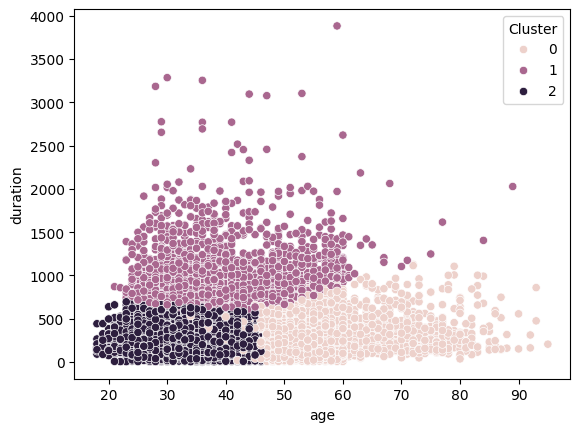

In [106]:
# Visualizar os clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='age', y='duration', hue='Cluster', data = data)
plt.show()

In [107]:
for i in range(3):  # Supondo que você tenha 3 clusters
    print(f"Cluster {i}:")
    print(data[data['Cluster'] == i].describe())
    print("\n")

Cluster 0:
               age       balance          day     duration     campaign  \
count  3300.000000   3300.000000  3300.000000  3300.000000  3300.000000   
mean     55.254242   2497.536364    15.694848   272.726970     2.498485   
std       8.960012   4973.046722     8.437307   190.627603     2.780055   
min      24.000000  -2712.000000     1.000000     5.000000     1.000000   
25%      49.000000    229.750000     8.000000   127.000000     1.000000   
50%      54.000000    926.500000    15.000000   226.000000     2.000000   
75%      59.000000   2812.000000    22.000000   387.000000     3.000000   
max      95.000000  81204.000000    31.000000  1127.000000    63.000000   

             pdays     previous  job_encoded  deposit_encoded  Cluster  \
count  3300.000000  3300.000000  3300.000000      3300.000000   3300.0   
mean     51.851515     0.899394     4.417273         0.450606      0.0   
std     105.103992     2.272214     2.908341         0.497630      0.0   
min      -1.00000

CLUSTER0:media de idade = 34/ media de duração = 24

CLUSTER1:media de idade = 55/ media de duração = 27

CLUSTER2:media de idade = 39/ media de duração = 10

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['job_encoded'] = encoder.fit_transform(data['job'])
data['deposit_encoded'] = encoder.fit_transform(data['deposit'])
data['education_encoded'] = encoder.fit_transform(data['education'])
data['marital_encoded'] = encoder.fit_transform(data['marital'])
data['housing_encoded'] = encoder.fit_transform(data['housing'])

In [113]:
features = data[['age', 'duration', 'job_encoded', 'balance','pdays','previous','campaign','housing_encoded','marital_encoded','education_encoded','Cluster']]


In [114]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = features
y = data['deposit_encoded']
my_model = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 27)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
accuracy_score(y_test,pred)

0.8054112166278444

In [109]:
from sklearn.model_selection import cross_val_score
valid_score = cross_val_score(my_model,x,y,cv=5)
print(valid_score)

[0.80564263 0.72010748 0.67697133 0.70743728 0.72311828]


In [88]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(my_model, random_state=27).fit(x_test,y_test)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.2145 ± 0.0148,duration
0.0270 ± 0.0023,housing_encoded
0.0237 ± 0.0040,age
0.0231 ± 0.0044,pdays
0.0108 ± 0.0018,balance
0.0078 ± 0.0024,campaign
0.0069 ± 0.0024,education_encoded
0.0069 ± 0.0036,previous
0.0056 ± 0.0014,marital_encoded
0.0051 ± 0.0033,job_encoded


In [96]:
data['probabilidade_deposit'] = my_model.predict_proba(x)[:, 1]
clientes_alvo = data[data['probabilidade_deposit'] > 0.5]  # Limite de probabilidade que você define
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,deposit,job_encoded,deposit_encoded,Cluster,probabilidade_deposit,segmento,education_encoded,marital_encoded,housing_encoded
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,unknown,yes,0,1,2,0.74,Alta,1,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,unknown,yes,0,1,0,0.68,Alta,1,1,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,unknown,yes,9,1,0,0.91,Alta,1,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,unknown,yes,7,1,2,0.82,Alta,1,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,unknown,yes,0,1,2,0.78,Alta,2,1,0


In [97]:
# Segmentação simples baseada na probabilidade
data['segmento'] = pd.cut(data['probabilidade_deposit'], bins=[0, 0.3, 0.7, 1], labels=['Baixa', 'Média', 'Alta'])

# Visualizar os segmentos
print(data['segmento'].value_counts())



segmento
Baixa    4665
Alta     4396
Média    1705
Name: count, dtype: int64


In [103]:
idade_media_por_segmento = data.groupby('segmento')['age'].mean()
duração_media_por_segmento = data.groupby('segmento')['duration'].mean()
saldo_medio_por_segmento = data.groupby('segmento')['balance'].mean()
print(idade_media_por_segmento)
print(duração_media_por_segmento)
print(saldo_medio_por_segmento)

segmento
Baixa    40.528403
Média    40.914370
Alta     42.113057
Name: age, dtype: float64
segmento
Baixa    187.152626
Média    369.676833
Alta     595.211101
Name: duration, dtype: float64
segmento
Baixa    1239.147481
Média    1693.900293
Alta     1852.955641
Name: balance, dtype: float64


#RESULTADO DA ANALISE:


--------------------------------------------------------------------------------

 1- clientes mais velhos, com um saldo maior e com um contato mais longo são mais propensos a assinar um contrato de depósito pode ajudar a direcionar campanhas de marketing especificamente para esses grupos. Você pode usar essas características para criar segmentos de clientes que são mais propensos a converter.

--------------------------------------------------------------------------------

2-Para aumentar a taxa de conversão, podemos personalizar as ofertas para os clientes com base em suas características. Por exemplo, para clientes mais velhos com saldos maiores e histórico de contatos mais longos, podemos oferecer produtos de depósito com condições especiais ou bônus para encorajar a assinatura.

-------------------------------------------------------------------------------

3-Como a duração do último contato está associada a uma maior probabilidade de conversão, considere treinar a equipe de vendas para dedicar mais tempo a conversas com clientes que mostram um interesse inicial. Além disso, podemos ajustar a abordagem de contato para garantir que os clientes tenham um engajamento mais longo.

--------------------------------------------------------------------------------

4-Um saldo maior pode indicar que o cliente tem mais capacidade de investir em produtos financeiros. Portanto, podemos priorizar clientes com saldos mais altos ao promover produtos financeiros que exigem um maior montante de investimento.

--------------------------------------------------------------------------------

5-Podemos criar um perfil de cliente com base nas caracteristicas de clientes com alta probabilidade de assinatura (saldo alto,idade mais avançada, maior duração no ultimo contato,etc...)
